In [1]:
import glob
import logging
import tempfile
import PIL
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import shutil
import sys
import logging
import tempfile
import os
import torch
from PIL import Image
import torchvision
import time
import SimpleITK as sitk
from scipy import ndimage
import numpy as np
from PIL import Image, ImageOps

## 1. Analysis script with grouping individual patient images

In [ ]:
#02.12.2021 #4-fold
import os
import glob
import imageio
import numpy as np
import ntpath
from scipy import misc
import glob
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import imageio
from PIL import Image

image_ori_path='/home/ychan/monai_test/Unpaired_MR_to_CT_Image_Synthesis-master/data/datasets/CBCT2CT_subselect7/testA/'
image_cor_path='/home/ychan/monai_test/Unpaired_MR_to_CT_Image_Synthesis-master/data/datasets/CBCT2CT_corrected/validationA/'
image_fs_path = '/home/ychan/monai_test/Unpaired_MR_to_CT_Image_Synthesis-master/data/datasets/CBCT2CT_fullysampled/testA/'

for epoch in range(10,191,10):
    experiement_folder = 'model_subselect7'
    image_cycleGAN_path='/home/ychan/monai_test/Unpaired_MR_to_CT_Image_Synthesis-master/results/'+experiement_folder +'/test_'+ str(epoch) +'/images/'

    ## Change '.tif' to '.tiff' due to PIL.Image
    for img_path in sorted(glob.glob(image_cycleGAN_path + "*fake_B.tif")):
        img_path_tiff=img_path.replace(".tif", ".tiff")
        os.rename(img_path, img_path_tiff)
        print(img_path)
#         image_cycleGAN = Image.open(img_path_tiff)

In [3]:
#02.12.2021 #4-fold
import os
import glob
import imageio
import numpy as np
import ntpath
from scipy import misc
import glob
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import imageio
from PIL import Image

image_ori_path='/home/ychan/monai_test/Unpaired_MR_to_CT_Image_Synthesis-master/data/datasets/CBCT2CT_subselect7/testA/'
image_cor_path='/home/ychan/monai_test/Unpaired_MR_to_CT_Image_Synthesis-master/data/datasets/CBCT2CT_corrected_updated/validationA/'
image_fs_path = '/home/ychan/monai_test/Unpaired_MR_to_CT_Image_Synthesis-master/data/datasets/CBCT2CT_fullysampled/testA/'
epoch=80
n_images_per_patient=195

cbct_intensity_min = 0.00
cbct_intensity_max = 65335

# ## Change '.tif' to '.tiff' due to PIL.Image
# for img_path in sorted(glob.glob(image_cycleGAN_path + "*fake_B.tif")):
#     img_path_tiff=img_path.replace(".tif", ".tiff")
#     os.rename(img_path, img_path_tiff)
#     image_cycleGAN = Image.open(img_path_tiff)

y0_ME = np.array([])
y1_ME = np.array([])
y2_ME = np.array([])
y0_MAE = np.array([])
y1_MAE = np.array([])
y2_MAE = np.array([])

for epoch in range(10,191,10):
# for epoch in range(50,81,10):
    image_cycleGAN=[]
    image_cycleGAN_mu_save=[]
    image_cor_mu_save=[]
    image_ori_mu_save=[]
    ME_cor_cycleGAN=[]
    MAE_cor_cycleGAN=[]
    ME_cor_ori=[]
    MAE_cor_ori=[]
    ME_cycleGAN_ori=[]
    MAE_cycleGAN_ori=[]
    slice_postition_list=[]
    patient_num_list=[]
    n_test_patients=3
    counter=0
    counter_epoch=0
    p=-1
    previous_patient='CBCT_00'
    image_cycleGAN_mu_per_patient = np.ones((n_test_patients,n_images_per_patient,512,512))
    image_cor_mu_per_patient= np.ones((n_test_patients,n_images_per_patient,512,512))
    image_ori_mu_per_patient= np.ones((n_test_patients,n_images_per_patient,512,512))
    image_fs_mu_per_patient= np.ones((n_test_patients,n_images_per_patient,512,512))
    image_cycleGAN_HU_median_per_patient= np.ones((n_test_patients,n_images_per_patient,512,512))
    image_cycleGAN_HU_max_min_per_patient= np.ones((n_test_patients,n_images_per_patient,512,512))
    image_cor_HU_per_patient= np.ones((n_test_patients,n_images_per_patient,512,512))
    slice_postition_array = np.ones((n_test_patients,n_images_per_patient))
    
    experiement_folder = 'model_subselect7'
    image_cycleGAN_path='/home/ychan/monai_test/Unpaired_MR_to_CT_Image_Synthesis-master/results/'+experiement_folder +'/test_'+ str(epoch) +'/images/'
    image_cycGAN_mha_path = '/home/ychan/monai_test/Unpaired_MR_to_CT_Image_Synthesis-master/results/' +experiement_folder +'/test_'+ str(epoch) +'/3Dmha/'
    if not os.path.exists(image_cycGAN_mha_path):
        os.makedirs(image_cycGAN_mha_path)
    # start time 
    # 1. "python test.py one image" x4 times
    
    for img_path in sorted(glob.glob(image_cycleGAN_path + "*fake_B.tiff")):
        image_cycleGAN = Image.open(img_path)
        image_cycleGAN = np.asarray(image_cycleGAN)
        image_cycleGAN=image_cycleGAN.astype(np.float32)
        image_cycleGAN_mu_1 = (image_cycleGAN - cbct_intensity_min) / (cbct_intensity_max - cbct_intensity_min) * 0.05

        # model_subselect4_2
        img_path=img_path.replace("model_subselect4", "model_subselect7_2")
        image_cycleGAN = Image.open(img_path)
        image_cycleGAN = np.asarray(image_cycleGAN)
        image_cycleGAN=image_cycleGAN.astype(np.float32)
        image_cycleGAN_mu_2 = (image_cycleGAN - cbct_intensity_min) / (cbct_intensity_max - cbct_intensity_min) * 0.05

        # model_subselect4_3
        img_path=img_path.replace("model_subselect4_2", "model_subselect7_3")
        image_cycleGAN = Image.open(img_path)
        image_cycleGAN = np.asarray(image_cycleGAN)
        image_cycleGAN=image_cycleGAN.astype(np.float32)
        image_cycleGAN_mu_3 = (image_cycleGAN - cbct_intensity_min) / (cbct_intensity_max - cbct_intensity_min) * 0.05


        # model_subselect4_4
        img_path=img_path.replace("model_subselect4_3", "model_subselect7_4")
        image_cycleGAN = Image.open(img_path)
        image_cycleGAN = np.asarray(image_cycleGAN)
        image_cycleGAN=image_cycleGAN.astype(np.float32)
        image_cycleGAN_mu_4 = (image_cycleGAN - cbct_intensity_min) / (cbct_intensity_max - cbct_intensity_min) * 0.05

        # 4-fold median & max-min
        # 2. median time
        image_cycleGAN_mu_median=np.median([image_cycleGAN_mu_1,image_cycleGAN_mu_2,image_cycleGAN_mu_3,image_cycleGAN_mu_4],axis=0)
    
        #get time
    
        image_cycleGAN_mu_max=np.max([image_cycleGAN_mu_1,image_cycleGAN_mu_2,image_cycleGAN_mu_3,image_cycleGAN_mu_4],axis=0)
        image_cycleGAN_mu_min=np.min([image_cycleGAN_mu_1,image_cycleGAN_mu_2,image_cycleGAN_mu_3,image_cycleGAN_mu_4],axis=0)
        image_cycleGAN_mu_max_min=image_cycleGAN_mu_max-image_cycleGAN_mu_min

    #####################################################################################
    # 1) Get corresponding ori, cor, fully sampled images; and
    # 2) Calculate median and max-min; and
    # 3) Group the individual images per patient

        short_path = ntpath.basename(img_path)
        short_path=short_path.replace('.tiff', '.png') # we saved our training inputs as .png
        short_path=short_path.replace('_fake_B', '')

        for file_name in os.listdir(image_cor_path): # find the paired corrected and original CBCT
            if file_name.endswith(short_path):
                #print('I am here',file_name)            

                ## corrected CBCT (label)
                image_cor = Image.open(image_cor_path+file_name)
                image_cor = np.asarray(image_cor)
                image_cor = image_cor.astype(np.float32)
                image_cor_mu = (image_cor - cbct_intensity_min) / (cbct_intensity_max - cbct_intensity_min) * 0.06   

                ## subselect CBCT (test input)
                image_ori = Image.open(image_ori_path+file_name)
                image_ori = np.asarray(image_ori)
                image_ori = image_ori.astype(np.float32)
                image_ori_mu = (image_ori - cbct_intensity_min) / (cbct_intensity_max - cbct_intensity_min) * 0.04

                ## fully sampled CBCT (for masking the test output?)
                image_fs = Image.open(image_fs_path+file_name)
                image_fs = np.asarray(image_fs)
                image_fs = image_fs.astype(np.float32)
                image_fs_mu = (image_fs - cbct_intensity_min) / (cbct_intensity_max - cbct_intensity_min) * 0.04

                ## Mask #no need to do it here
                struct1 = np.ones((15,15))
                struct2 = np.ones((15,15))
                mask=np.array(image_fs_mu)>0.008
                mask=ndimage.binary_erosion(mask,structure=struct1).astype(mask.dtype)
                mask=ndimage.binary_dilation(mask,structure=struct2).astype(mask.dtype)
                image_cycleGAN_mu_median=image_cycleGAN_mu_median*mask
                image_cycleGAN_mu_max_min=image_cycleGAN_mu_max_min*mask

                # HU
                image_cycleGAN_HU_median = image_cycleGAN_mu_median * 65536.0 - 1024 
                image_cycleGAN_HU_max_min = image_cycleGAN_mu_max_min * 65536.0 
                
                image_cor_HU = image_cor_mu * 65536.0 - 1024 

                #  Evaluate each patient image
                ## group images of individual patient
                if len(short_path.split('_')[0])==7:
                    patient_number=int(short_path[5:7])
                    patient_ID = short_path[0:7]
                else:
                    patient_number=int(short_path[6:8])
                    patient_ID = short_path[0:8]

                #Get origin from the name
                slice_postition_png_str=str(short_path.split("_s",1)[1])
                slice_postition=float(slice_postition_png_str.split(".p",1,)[0])

                if previous_patient != patient_ID:
                    # get the number of images per patient
                    z = glob.glob(image_cycleGAN_path + "*fake_B.tiff")
                    n_images_per_patient = sum(patient_ID in s for s in z)
                    previous_patient = patient_ID
                    counter=0
                    p=p+1
                    patient_num_list=np.append(patient_num_list, int(patient_number))

                np.asarray(image_cycleGAN_mu_per_patient)[p,counter,:,:]=np.asarray(image_cycleGAN_mu_median)
                np.asarray(image_cor_mu_per_patient)[p,counter,:,:]=np.asarray(image_cor_mu)
                np.asarray(image_ori_mu_per_patient)[p,counter,:,:]=np.asarray(image_ori_mu)
                np.asarray(image_fs_mu_per_patient)[p,counter,:,:]=np.asarray(image_fs_mu)
                
                # HU
                np.asarray(image_cycleGAN_HU_median_per_patient)[p,counter,:,:]=np.asarray(image_cycleGAN_HU_median)
                np.asarray(image_cycleGAN_HU_max_min_per_patient)[p,counter,:,:]=np.asarray(image_cycleGAN_HU_max_min)
                np.asarray(image_cor_HU_per_patient)[p,counter,:,:]=np.asarray(image_cor_HU)
                
                slice_postition_array[p,counter]=slice_postition

                counter=counter+1

    ## To re-ordered the slice sequence by the origin[2] and save as .mha
    n_images_per_patient=195
    image_cycleGAN_mu_per_patient_sorted=np.ones((n_test_patients,n_images_per_patient,512,512))
    image_cor_mu_per_patient_sorted=np.ones((n_test_patients,n_images_per_patient,512,512))
    image_ori_mu_per_patient_sorted=np.ones((n_test_patients,n_images_per_patient,512,512))
    image_fs_mu_per_patient_sorted=np.ones((n_test_patients,n_images_per_patient,512,512))
    image_cycleGAN_HU_median_per_patient_sorted=np.ones((n_test_patients,n_images_per_patient,512,512))
    image_cycleGAN_HU_max_min_per_patient_sorted=np.ones((n_test_patients,n_images_per_patient,512,512))
    image_cor_HU_per_patient_sorted=np.ones((n_test_patients,n_images_per_patient,512,512))

    for p in range(len(slice_postition_array)):
        temp_slices=slice_postition_array[p,:]
        temp=np.copy(image_cycleGAN_mu_per_patient[p,:,:,:])
        indices=temp_slices.argsort()
        slices_sorted=np.copy(temp_slices[indices])
        image_cycleGAN_mu_per_patient_sorted[p,:,:,:]=temp[indices,:,:]
        temp=np.copy(image_cor_mu_per_patient[p,:,:,:])
        image_cor_mu_per_patient_sorted[p,:,:,:]=temp[indices,:,:]
        temp=np.copy(image_ori_mu_per_patient[p,:,:,:])
        image_ori_mu_per_patient_sorted[p,:,:,:]=temp[indices,:,:]
        temp=np.copy(image_fs_mu_per_patient[p,:,:,:])
        image_fs_mu_per_patient_sorted[p,:,:,:]=temp[indices,:,:]
        temp=np.copy(image_cycleGAN_HU_median_per_patient[p,:,:,:])
        image_cycleGAN_HU_median_per_patient_sorted[p,:,:,:]=temp[indices,:,:]
        temp=np.copy(image_cycleGAN_HU_max_min_per_patient[p,:,:,:])
        image_cycleGAN_HU_max_min_per_patient_sorted[p,:,:,:]=temp[indices,:,:]
        temp=np.copy(image_cor_HU_per_patient[p,:,:,:])
        image_cor_HU_per_patient_sorted[p,:,:,:]=temp[indices,:,:]

        patient_ID="CBCT00"+str(patient_num_list[p])
        temp=image_cycleGAN_mu_per_patient_sorted[p,:,:,:]
        temp=np.flip(temp,axis=0)
        image_cycleGAN_mu_save_3D = sitk.GetImageFromArray(temp)
        image_cycleGAN_mu_save_3D.SetSpacing([1,1,1])
        image_cycleGAN_mu_save_3D.SetOrigin([-256,-256,-97.5])
#         save_path= str(os.path.join(image_cycGAN_mha_path +patient_ID+ '_fakeB_4fold'+ '.mha'))
#         print(save_path)
#         sitk.WriteImage(image_cycleGAN_mu_save_3D, save_path)

        temp=image_cor_mu_per_patient_sorted[p,:,:,:]
        temp=np.flip(temp,axis=0)        
        image_cor_mu_save_3D = sitk.GetImageFromArray(temp)
        image_cor_mu_save_3D.SetSpacing([1,1,1])
        image_cor_mu_save_3D.SetOrigin([-256,-256,-97.5])
#         save_path= str(os.path.join(image_cycGAN_mha_path +patient_ID+ '_cor'+ '.mha'))
#         print(save_path)
#         sitk.WriteImage(image_cor_mu_save_3D, save_path)

        temp=image_ori_mu_per_patient_sorted[p,:,:,:]
        temp=np.flip(temp,axis=0)    
        image_ori_mu_save_3D = sitk.GetImageFromArray(temp)
        image_ori_mu_save_3D.SetSpacing([1,1,1])
        image_ori_mu_save_3D.SetOrigin([-256,-256,-97.5])
#         save_path= str(os.path.join(image_cycGAN_mha_path +patient_ID+ '_ori'+ '.mha'))
#         print(save_path)
#         sitk.WriteImage(image_ori_mu_save_3D, save_path)

        temp=image_fs_mu_per_patient_sorted[p,:,:,:]
        temp=np.flip(temp,axis=0)    
        image_fs_mu_save_3D = sitk.GetImageFromArray(temp)
        image_fs_mu_save_3D.SetSpacing([1,1,1])
        image_fs_mu_save_3D.SetOrigin([-256,-256,-97.5])
#         save_path= str(os.path.join(image_cycGAN_mha_path +patient_ID+ '_fs'+ '.mha'))
#         print(save_path)
#         sitk.WriteImage(image_fs_mu_save_3D, save_path)

        temp=image_cycleGAN_HU_median_per_patient_sorted[p,:,:,:]
        temp=np.flip(temp,axis=0)    
        image_cycleGAN_HU_median_save_3D = sitk.GetImageFromArray(temp)
        image_cycleGAN_HU_median_save_3D.SetSpacing([1,1,1])
        image_cycleGAN_HU_median_save_3D.SetOrigin([-256,-256,-97.5])
#         save_path= str(os.path.join(image_cycGAN_mha_path +patient_ID+ '_fakeB_4fold_HU'+ '.mha'))
#         print(save_path)
#         sitk.WriteImage(image_cycleGAN_HU_median_save_3D, save_path)

        temp=image_cycleGAN_HU_max_min_per_patient_sorted[p,:,:,:]
        temp=np.flip(temp,axis=0)    
        image_cycleGAN_HU_max_min_save_3D = sitk.GetImageFromArray(temp)
        image_cycleGAN_HU_max_min_save_3D.SetSpacing([1,1,1])
        image_cycleGAN_HU_max_min_save_3D.SetOrigin([-256,-256,-97.5])
#         save_path= str(os.path.join(image_cycGAN_mha_path +patient_ID+ '_fakeB_max_min_HU'+ '.mha'))
#         print(save_path)
#         sitk.WriteImage(image_cycleGAN_HU_max_min_save_3D, save_path)

        temp=image_cor_HU_per_patient_sorted[p,:,:,:]
        temp=np.flip(temp,axis=0)        
        image_cor_HU_save_3D = sitk.GetImageFromArray(temp)
        image_cor_HU_save_3D.SetSpacing([1,1,1])
        image_cor_HU_save_3D.SetOrigin([-256,-256,-97.5])
#         save_path= str(os.path.join(image_cycGAN_mha_path +patient_ID+ '_cor_HU'+ '.mha'))
#         print(save_path)
#         sitk.WriteImage(image_cor_HU_save_3D, save_path)

#####################################################################################
# # 1) Calculate the ME and MAE by each validation patient
# # 2) Mask the images by fully sampled

#     ME_CBCTorg_ar      = np.array([])
#     ME_CBCTcor_gan_ar = np.array([])
#     MAE_CBCTorg_ar      = np.array([])
#     MAE_CBCTcor_gan_ar = np.array([])
#     struct1 = np.ones((15,15))
#     struct2 = np.ones((15,15))
#     mask=ndimage.binary_erosion(mask,structure=struct1).astype(mask.dtype)
#     mask=ndimage.binary_dilation(mask,structure=struct2).astype(mask.dtype)

#     #test data
#     for pp in range(len(image_cor_mu_per_patient_sorted)): 
#         for s in range(image_cor_mu_per_patient_sorted.shape[1]):

#             # Apply binary mask:  
#             binaryMASKbody = (np.array(image_cor_mu_per_patient_sorted[pp,s,:,:])>0.008) & (np.array(image_cycleGAN_mu_per_patient_sorted[pp,s,:,:])>0.008)
#             struct_mask = np.ones((10,10))
#             binaryMASKbody = ndimage.binary_closing(binaryMASKbody, structure=struct_mask).astype(mask.dtype)
#             #erosion

#             CBCTcor_gan_trunc_mask = np.ma.masked_array(image_cycleGAN_mu_per_patient_sorted[pp,s,:,:], binaryMASKbody < 0.5)
#             CBCTcor_trunc_mask = np.ma.masked_array(image_cor_mu_per_patient_sorted[pp,s,:,:], binaryMASKbody < 0.5) 
#             CBCTorg_trunc_mask = np.ma.masked_array(image_ori_mu_per_patient_sorted[pp,s,:,:], binaryMASKbody < 0.5)
#             # Calculate ME and MAE:
#             ME_CBCTorg      = np.mean(CBCTcor_trunc_mask-CBCTorg_trunc_mask)
#             ME_CBCTcor_gan = np.mean(CBCTcor_trunc_mask-CBCTcor_gan_trunc_mask)
#             MAE_CBCTorg      = np.mean(np.abs(CBCTcor_trunc_mask-CBCTorg_trunc_mask))
#             MAE_CBCTcor_gan = np.mean(np.abs(CBCTcor_trunc_mask-CBCTcor_gan_trunc_mask))
#             # Array for all patients:
#             ME_CBCTorg_ar       = np.append(ME_CBCTorg_ar, ME_CBCTorg)
#             ME_CBCTcor_gan_ar  = np.append(ME_CBCTcor_gan_ar, ME_CBCTcor_gan)
#             MAE_CBCTorg_ar      = np.append(MAE_CBCTorg_ar, MAE_CBCTorg)
#             MAE_CBCTcor_gan_ar = np.append(MAE_CBCTcor_gan_ar, MAE_CBCTcor_gan)

#     print('----------------------------------------------------------------')
#     print('Epoch                  : ', str(epoch))
#     print('\n Mean ME CBCTorg     : ',np.mean(ME_CBCTorg_ar)*2**16)
#     print('\n Mean ME CBCTcorGAN  : ',np.mean(ME_CBCTcor_gan_ar)*2**16)
#     print('\n Mean MAE CBCTorg    : ',np.mean(MAE_CBCTorg_ar)*2**16)
#     print('\n Mean MAE CBCTcorGAN : ',np.mean(MAE_CBCTcor_gan_ar)*2**16)
#     print('\n ----------------------------------------------------------------')

#####################################################################################

    ME_CBCTorg_ar      = np.array([])
    ME_CBCTcor_gan_ar = np.array([])
    MAE_CBCTorg_ar      = np.array([])
    MAE_CBCTcor_gan_ar = np.array([])
    struct1 = np.ones((15,15))
    struct2 = np.ones((15,15))
    mask=ndimage.binary_erosion(mask,structure=struct1).astype(mask.dtype)
    mask=ndimage.binary_dilation(mask,structure=struct2).astype(mask.dtype)

    #test data
    for pp in range(len(image_cor_mu_per_patient_sorted)): 
        for s in range(image_cor_mu_per_patient_sorted.shape[1]):

            # Apply binary mask:  
            binaryMASKbody = (np.array(image_cor_mu_per_patient_sorted[pp,s,:,:])>0.008) & (np.array(image_cycleGAN_mu_per_patient_sorted[pp,s,:,:])>0.008)
            struct_mask = np.ones((10,10))
            binaryMASKbody = ndimage.binary_closing(binaryMASKbody, structure=struct_mask).astype(mask.dtype)
            # still add erosion?
            CBCTcor_gan_trunc_mask = np.ma.masked_array(image_cycleGAN_mu_per_patient_sorted[pp,s,:,:], binaryMASKbody < 0.5)
            CBCTcor_trunc_mask = np.ma.masked_array(image_cor_mu_per_patient_sorted[pp,s,:,:], binaryMASKbody < 0.5) 
            CBCTorg_trunc_mask = np.ma.masked_array(image_ori_mu_per_patient_sorted[pp,s,:,:], binaryMASKbody < 0.5)
            # Calculate ME and MAE:
            ME_CBCTorg      = np.mean(CBCTcor_trunc_mask-CBCTorg_trunc_mask)
            ME_CBCTcor_gan = np.mean(CBCTcor_trunc_mask-CBCTcor_gan_trunc_mask)
            MAE_CBCTorg      = np.mean(np.abs(CBCTcor_trunc_mask-CBCTorg_trunc_mask))
            MAE_CBCTcor_gan = np.mean(np.abs(CBCTcor_trunc_mask-CBCTcor_gan_trunc_mask))
            # Array for all patients:
            ME_CBCTorg_ar       = np.append(ME_CBCTorg_ar, ME_CBCTorg)
            ME_CBCTcor_gan_ar  = np.append(ME_CBCTcor_gan_ar, ME_CBCTcor_gan)
            MAE_CBCTorg_ar      = np.append(MAE_CBCTorg_ar, MAE_CBCTorg)
            MAE_CBCTcor_gan_ar = np.append(MAE_CBCTcor_gan_ar, MAE_CBCTcor_gan)


        ME_CBCTorg_per_pat = ME_CBCTorg_ar
        ME_CBCTcor_gan_per_pat = ME_CBCTcor_gan_ar
        MAE_CBCTorg_per_pat = MAE_CBCTorg_ar
        MAE_CBCTcor_gan_per_pat = MAE_CBCTcor_gan_ar

        ME_CBCTorg_ar      = np.array([])
        ME_CBCTcor_gan_ar = np.array([])
        MAE_CBCTorg_ar      = np.array([])
        MAE_CBCTcor_gan_ar = np.array([])

        print('----------------------------------------------------------------')
        print('\n Epoch  : ', str(epoch))
        print('\n Patient  : ', pp)
        print('\n Mean ME CBCTorg     : ',np.mean(ME_CBCTorg_per_pat)*2**16)
        print('\n Mean ME CBCTcorGAN  : ',np.mean(ME_CBCTcor_gan_per_pat)*2**16)
        print('\n Mean MAE CBCTorg    : ',np.mean(MAE_CBCTorg_per_pat)*2**16)
        print('\n Mean MAE CBCTcorGAN : ',np.mean(MAE_CBCTcor_gan_per_pat)*2**16)
        print('\n ----------------------------------------------------------------')
        
        if pp == 0:
            y0_ME = np.append(y0_ME,np.mean(ME_CBCTcor_gan_per_pat)*2**16)
            y0_MAE = np.append(y0_MAE, np.mean(MAE_CBCTcor_gan_per_pat)*2**16)
        elif pp == 1:
            y1_ME = np.append(y1_ME, np.mean(ME_CBCTcor_gan_per_pat)*2**16)
            y1_MAE = np.append(y1_MAE, np.mean(MAE_CBCTcor_gan_per_pat)*2**16)
        elif pp== 2:
            y2_ME = np.append(y2_ME,np.mean(ME_CBCTcor_gan_per_pat)*2**16)
            y2_MAE = np.append(y2_MAE, np.mean(MAE_CBCTcor_gan_per_pat)*2**16)
            
    print(y0_MAE)
    print(y1_MAE)
    print(y2_MAE)

----------------------------------------------------------------

 Epoch  :  10

 Patient  :  0

 Mean ME CBCTorg     :  -14.960382259603971

 Mean ME CBCTcorGAN  :  85.0705949613173

 Mean MAE CBCTorg    :  157.8400783083432

 Mean MAE CBCTcorGAN :  149.95087948157897

 ----------------------------------------------------------------
----------------------------------------------------------------

 Epoch  :  10

 Patient  :  1

 Mean ME CBCTorg     :  -21.941159916977565

 Mean ME CBCTcorGAN  :  82.11401267441103

 Mean MAE CBCTorg    :  151.6359985051334

 Mean MAE CBCTcorGAN :  137.5742685251285

 ----------------------------------------------------------------
----------------------------------------------------------------

 Epoch  :  10

 Patient  :  2

 Mean ME CBCTorg     :  6.3621621132929835

 Mean ME CBCTcorGAN  :  82.15533839736862

 Mean MAE CBCTorg    :  151.11799706763912

 Mean MAE CBCTcorGAN :  146.3868549926457

 ------------------------------------------------------

----------------------------------------------------------------

 Epoch  :  80

 Patient  :  0

 Mean ME CBCTorg     :  -14.769245589752538

 Mean ME CBCTcorGAN  :  77.48432768023139

 Mean MAE CBCTorg    :  157.5575946550107

 Mean MAE CBCTcorGAN :  162.1731547948881

 ----------------------------------------------------------------
----------------------------------------------------------------

 Epoch  :  80

 Patient  :  1

 Mean ME CBCTorg     :  -22.27765794329949

 Mean ME CBCTcorGAN  :  74.15332061051191

 Mean MAE CBCTorg    :  151.44786863373602

 Mean MAE CBCTcorGAN :  147.09814241501056

 ----------------------------------------------------------------
----------------------------------------------------------------

 Epoch  :  80

 Patient  :  2

 Mean ME CBCTorg     :  5.914904094155698

 Mean ME CBCTcorGAN  :  72.50213226920611

 Mean MAE CBCTorg    :  150.946078370614

 Mean MAE CBCTcorGAN :  154.58476976679123

 -------------------------------------------------------

----------------------------------------------------------------

 Epoch  :  140

 Patient  :  0

 Mean ME CBCTorg     :  -15.22173594719287

 Mean ME CBCTcorGAN  :  15.072948979961252

 Mean MAE CBCTorg    :  157.5213431589102

 Mean MAE CBCTcorGAN :  111.31610868694847

 ----------------------------------------------------------------
----------------------------------------------------------------

 Epoch  :  140

 Patient  :  1

 Mean ME CBCTorg     :  -21.899804107283757

 Mean ME CBCTcorGAN  :  -2.7252281179405227

 Mean MAE CBCTorg    :  151.35293917865158

 Mean MAE CBCTcorGAN :  103.03162151263076

 ----------------------------------------------------------------
----------------------------------------------------------------

 Epoch  :  140

 Patient  :  2

 Mean ME CBCTorg     :  5.456321924266715

 Mean ME CBCTcorGAN  :  -5.72660665703089

 Mean MAE CBCTorg    :  150.88705092256018

 Mean MAE CBCTcorGAN :  116.49596512923439

 ----------------------------------------------

----------------------------------------------------------------

 Epoch  :  190

 Patient  :  0

 Mean ME CBCTorg     :  -14.567013304121737

 Mean ME CBCTcorGAN  :  15.70150078256029

 Mean MAE CBCTorg    :  157.50715151702514

 Mean MAE CBCTcorGAN :  116.80503431895721

 ----------------------------------------------------------------
----------------------------------------------------------------

 Epoch  :  190

 Patient  :  1

 Mean ME CBCTorg     :  -21.926608822245527

 Mean ME CBCTcorGAN  :  -3.363030491600791

 Mean MAE CBCTorg    :  151.14886619253866

 Mean MAE CBCTcorGAN :  108.00613221881697

 ----------------------------------------------------------------
----------------------------------------------------------------

 Epoch  :  190

 Patient  :  2

 Mean ME CBCTorg     :  4.643110705806242

 Mean ME CBCTcorGAN  :  -4.395017669793858

 Mean MAE CBCTorg    :  150.19169351341154

 Mean MAE CBCTcorGAN :  124.57907007160892

 ---------------------------------------------

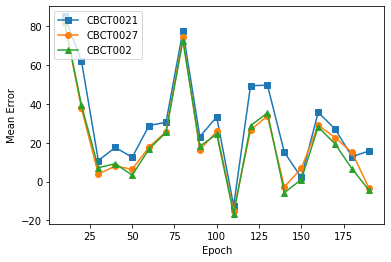

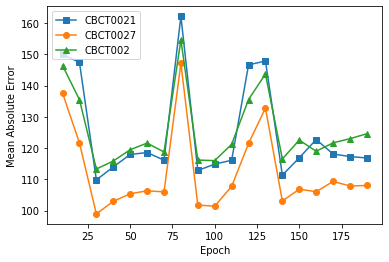

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 19
# x = np.linspace(0, 190, 10, endpoint=True)
x = np.linspace(10, 190, N, endpoint=True)

plt.figure(1)
plt.plot(x, y0_ME, "-s", label="CBCT0021")
plt.plot(x, y1_ME, "-o", label="CBCT0027")
plt.plot(x, y2_ME, "-^", label="CBCT002")
plt.xlabel('Epoch')
plt.ylabel('Mean Error')
plt.legend(loc="upper left")
# plt.style.use('default')
plt.show()
 

plt.figure(2)
plt.plot(x, y0_MAE, "-s", label="CBCT0021")
plt.plot(x, y1_MAE, "-o", label="CBCT0027")
plt.plot(x, y2_MAE, "-^", label="CBCT002")
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc="upper left")
# plt.style.use('default')
plt.show()
# x0 = [2]
# y0 = [1]



In [ ]:
#DEBUG
p = 1
s = 100
x=np.linspace(0, 511, 512)
y=np.linspace(0, 511, 512)

# Apply binary mask:  
binaryMASKbody = (np.array(image_cor_mu_per_patient_sorted[p,s,:,:])>0.008) & (np.array(image_cycleGAN_mu_per_patient_sorted[p,s,:,:])>0.008)
struct_mask = np.ones((10,10))
binaryMASKbody = ndimage.binary_closing(binaryMASKbody, structure=struct_mask).astype(mask.dtype)

CBCTcor_gan_trunc_mask = np.ma.masked_array(image_cycleGAN_mu_per_patient_sorted[p,s,:,:], binaryMASKbody < 0.5)
CBCTcor_trunc_mask = np.ma.masked_array(image_cor_mu_per_patient_sorted[p,s,:,:], binaryMASKbody < 0.5) 
CBCTorg_trunc_mask = np.ma.masked_array(image_ori_mu_per_patient_sorted[p,s,:,:], binaryMASKbody < 0.5)
diff= -(CBCTcor_trunc_mask-CBCTorg_trunc_mask)*2**16
diff_cor_gan= -(CBCTcor_trunc_mask-CBCTcor_gan_trunc_mask)*2**16

plt.figure(1,(15,10))
plt.subplot(1,3,1)
plt.title("CBCTcor_gan_trunc_mask")
plt.imshow(CBCTcor_gan_trunc_mask,cmap="gray")

plt.subplot(1,3,2)
plt.title("binaryMASKbody")
# mask_5= mask < 0.5
plt.imshow( binaryMASKbody,cmap="gray")

plt.subplot(1,3,3)
plt.title("CBCTcor_trunc_mask")
plt.imshow(CBCTcor_trunc_mask,cmap="gray")

plt.figure(2,(20,5))
plt.subplot(1,3,1)
plt.title("CBCTorg_trunc_mask")
plt.imshow(CBCTorg_trunc_mask,cmap="gray")
plt.colorbar()

# plt.subplot(1,3,2)
# plt.title("current_image_cbct")
# plt.imshow(current_image_cbct,cmap="gray")
# plt.colorbar()

plt.subplot(1,3,2)
plt.title("diff")
# plt.imshow(diff[s,:,:])
plt.pcolormesh(x,y*(-1),np.array(diff), vmin=-250,vmax=250, cmap=plt.cm.bwr,shading='gouraud')
plt.colorbar()

plt.subplot(1,3,3)
plt.title("diff_cor_gan")
# plt.imshow(diff[s,:,:])
plt.pcolormesh(x,y*(-1),np.array(diff_cor_gan), vmin=-250,vmax=250, cmap=plt.cm.bwr,shading='gouraud')
plt.colorbar()